In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df= pd.read_csv(r'F:/Data Science/Diwali_Analysis/Diwali Sales Data.csv', encoding='unicode_escape')
#to avoid encoding error, use 'unicode_ecaspe'


df.shape
# df.info()
# df.describe()
# df.isnull().sum()
# df['Order Date'] = pd.to_datetime(df['Order Date'])
# df['Month'] = df['Order Date'].dt.month
# df['Year'] = df['Order Date'].dt.year
# df['Day'] = df['Order Date'].dt.day
# df['Order Date'].head()
# df.head()
# df['Month'].value_counts()
# df['Year'].value_counts()
# df['Day'].value_counts()
# df['Month'].value_counts().plot(kind='bar')

(11251, 15)

In [3]:
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.00,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.00,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.00,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.00,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.00,NaN,NaN
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877.00,NaN,NaN
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841.00,NaN,NaN
7,1002092,Shivangi,P00273442,F,55+,61,0,Maharashtra,Western,IT Sector,Auto,1,NaN,NaN,NaN
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809.00,NaN,NaN
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799.99,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#drp the un wanted column
df.drop(['Status','unnamed1'], axis=1, inplace=True)

In [6]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(inplace=True) #remove the null valus, inplace=True means it will be done in the same df


In [8]:
#change the data type
df['Amount']=df['Amount'].astype('int')
df['Amount'].dtype

dtype('int64')

In [9]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [10]:
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


Exploratory Data Analysis


Gender

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

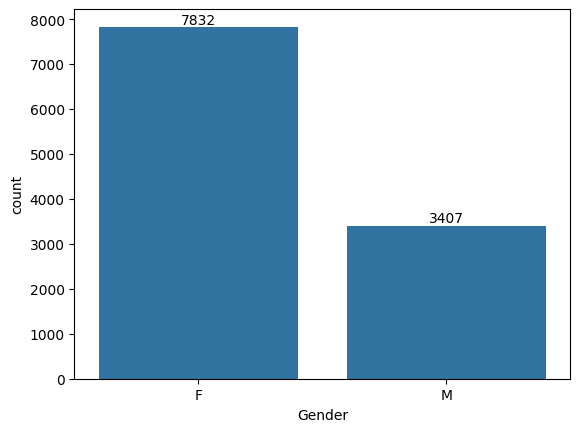

In [12]:
axis=sns.countplot(x='Gender', data=df)
for bars in axis.containers:
    axis.bar_label(bars)  #for lable the bars with the count

<Axes: xlabel='Gender', ylabel='Amount'>

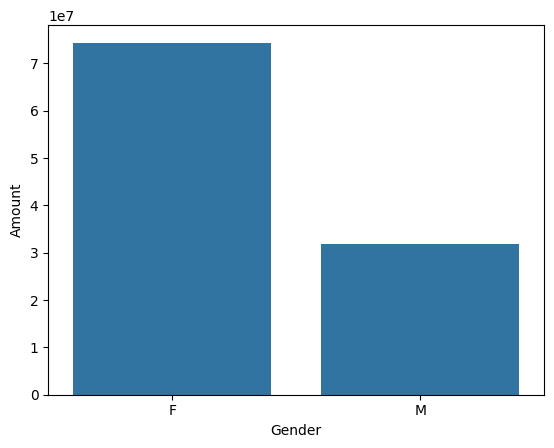

In [13]:
sales_gen=df.groupby(['Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Gender',y='Amount',data=sales_gen)

from above graph we can see that female customers are spending more than male customers


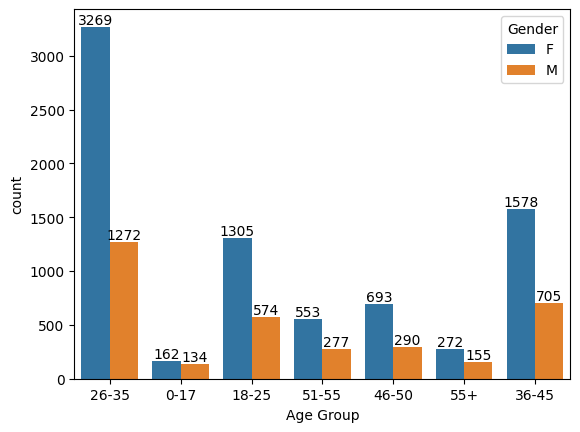

In [14]:
ax= sns.countplot(x='Age Group', hue='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

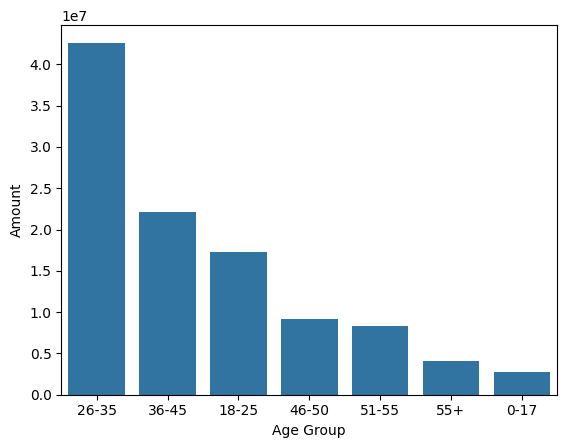

In [15]:
#total amount vs age group
sales_gen=df.groupby(['Age Group'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Age Group',y='Amount',data=sales_gen)


from the above grathic we can see that 26-35 age group is spending more than other age group and the female customers are spending more than male customers



State

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Kerala'),
  Text(8, 0, 'Haryana'),
  Text(9, 0, 'Gujarat')])

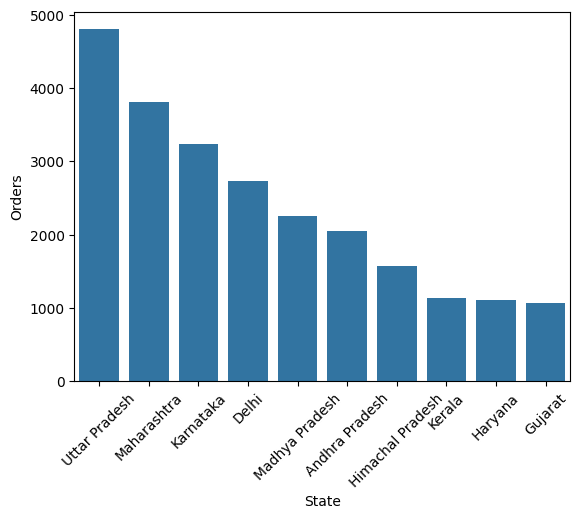

In [16]:
sales_state=df.groupby(['State'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.barplot(x='State',y='Orders',data=sales_state)
plt.xticks(rotation=45)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Uttar Pradesh'),
  Text(1, 0, 'Maharashtra'),
  Text(2, 0, 'Karnataka'),
  Text(3, 0, 'Delhi'),
  Text(4, 0, 'Madhya Pradesh'),
  Text(5, 0, 'Andhra\xa0Pradesh'),
  Text(6, 0, 'Himachal Pradesh'),
  Text(7, 0, 'Haryana'),
  Text(8, 0, 'Bihar'),
  Text(9, 0, 'Gujarat')])

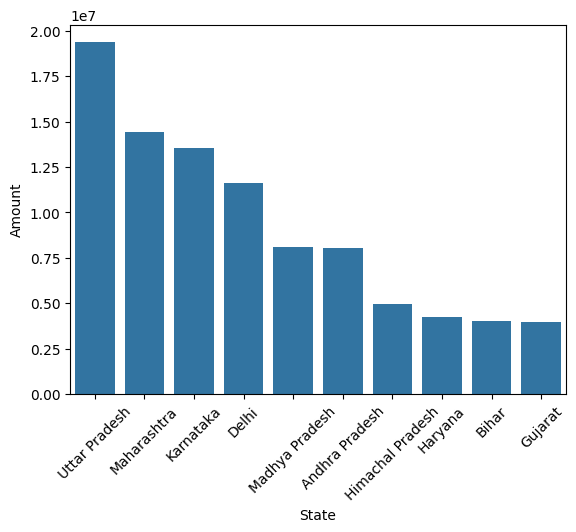

In [17]:
#total amount/sales from top 10 states
sales_state=df.groupby(['State'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)
sns.barplot(x='State',y='Amount',data=sales_state)
plt.xticks(rotation=45)

from this graphs we can see that Uttr pradesh,Maharashtra, karnataka and delhi  is spending more than other states.


marital status

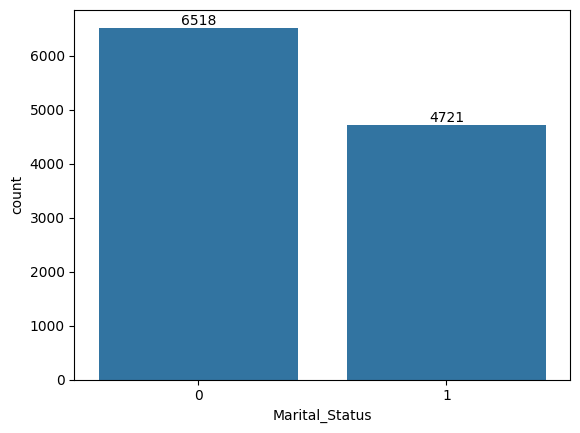

In [18]:
ax=sns.countplot(x='Marital_Status',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

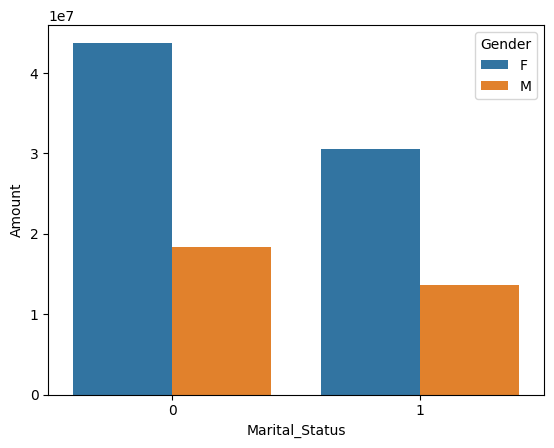

In [19]:
sales_state=df.groupby(['Marital_Status','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sales_state)

from the above graph married woman having more purchaing power

Occupation 

<Axes: xlabel='Occupation', ylabel='Amount'>

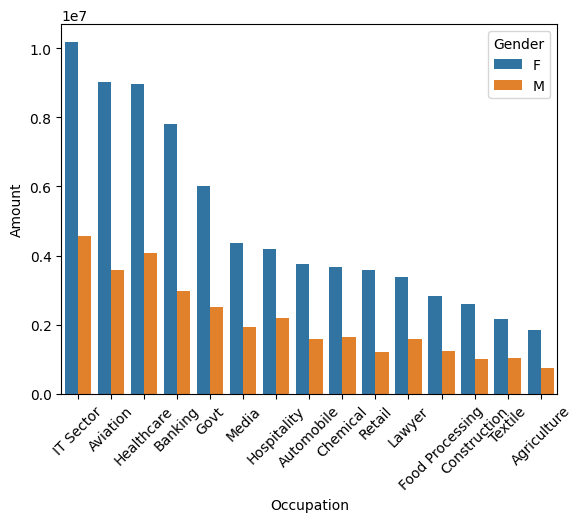

In [20]:
sales_occ=df.groupby(['Occupation','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.xticks(rotation=45)
sns.barplot(x='Occupation',y='Amount',hue='Gender',data=sales_occ)

from the above graph IT sector,Aviation ,healthcare and Banking is spending more than other occupational woman spending more than other occupation

In [21]:
df.columns
df.head(10)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877
5,1000588,Joni,P00057942,M,26-35,28,1,Himachal Pradesh,Northern,Food Processing,Auto,1,23877
6,1001132,Balk,P00018042,F,18-25,25,1,Uttar Pradesh,Central,Lawyer,Auto,4,23841
8,1003224,Kushal,P00205642,M,26-35,35,0,Uttar Pradesh,Central,Govt,Auto,2,23809
9,1003650,Ginny,P00031142,F,26-35,26,1,Andhra Pradesh,Southern,Media,Auto,4,23799
10,1003829,Harshita,P00200842,M,26-35,34,0,Delhi,Central,Banking,Auto,1,23770


product category

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Clothing & Apparel'),
  Text(1, 0, 'Food'),
  Text(2, 0, 'Electronics & Gadgets'),
  Text(3, 0, 'Footwear & Shoes'),
  Text(4, 0, 'Household items'),
  Text(5, 0, 'Beauty'),
  Text(6, 0, 'Games & Toys'),
  Text(7, 0, 'Sports Products'),
  Text(8, 0, 'Furniture'),
  Text(9, 0, 'Pet Care')])

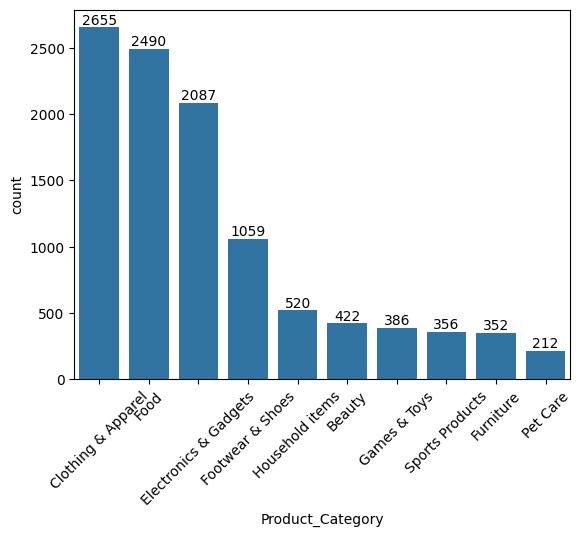

In [22]:
# Calculate the counts for each product category and get the top 10
top_10_categories = df['Product_Category'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 categories
filtered_df = df[df['Product_Category'].isin(top_10_categories)]

# Create a count plot for the top 10 product categories
ax=sns.countplot(x='Product_Category', data=filtered_df, order=top_10_categories)
for bars in ax.containers:
    ax.bar_label(bars)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

from above grapth we can see thatmost of the footwear , food and electronic category

<Axes: xlabel='Product_Category', ylabel='Orders'>

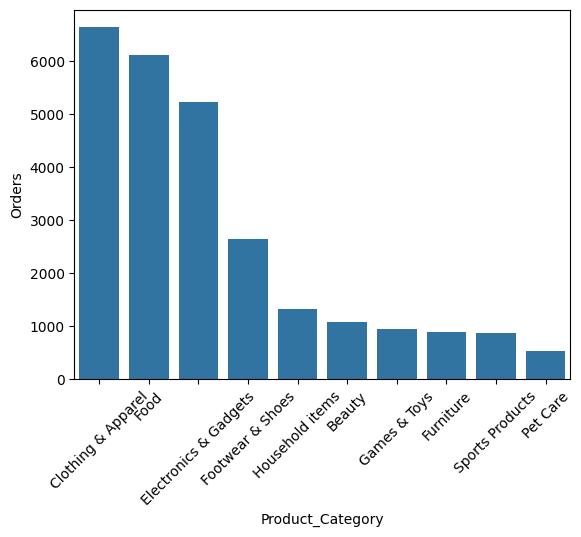

In [23]:
sales_productId=df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
plt.xticks(rotation=45)
sns.barplot(x='Product_Category',y='Orders',data=sales_productId)